# GMM From Scratch

In [2]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal, norm
import warnings
import random

warnings.filterwarnings("ignore")

np.random.seed(1)

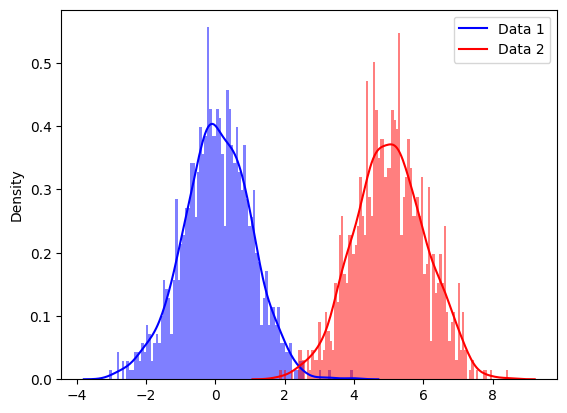

In [3]:
# Generate data with multiple nodes
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(5, 1, 1000)

# plot the data using seaborn's distplot function
sns.distplot(data1, hist=True, kde=True, bins=100, color='b', hist_kws={'alpha': 0.5})
sns.distplot(data2, hist=True, kde=True, bins=100, color='r', hist_kws={'alpha': 0.5})


# Add a legend
plt.legend(['Data 1', 'Data 2'])

# Show the plot
plt.show()

In [6]:
# Set mean and covariance
mean1 = [0, 0]
mean2 = [2, 0]
cov1 = [[1, 0.7], [0.7, 1]]
cov2 = [[.5, .4], [.4, .5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1, cov1, 1000)
data2 = np.random.multivariate_normal(mean2, cov2, 1000)

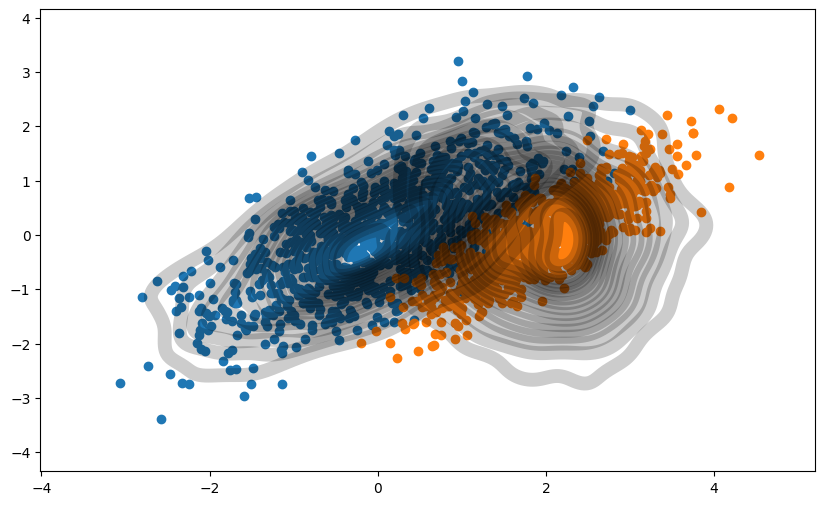

In [7]:
# Plt the given data
plt.figure(figsize=(10, 6))

plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])

sns.kdeplot(x=data1[:, 0], y=data1[:, 1], levels=20, linewidths=10, color='k', alpha=0.2)
sns.kdeplot(x=data2[:, 0], y=data1[:, 1], levels=20, linewidths=10, color='k', alpha=0.2)

plt.grid(False)
plt.show()

In [8]:
n_samples =100
mu1, sigma1 = -5, 1.2
mu2, sigma2 = 5, 1.8
mu3, sigma3 = 0, 1.6

x1 = np.random.normal(loc=mu1, scale=np.sqrt(sigma1), size=n_samples)
x2 = np.random.normal(loc=mu2, scale=np.sqrt(sigma2), size=n_samples)
x3 = np.random.normal(loc=mu3, scale=np.sqrt(sigma3), size=n_samples)

X = np.concatenate((x1, x2, x3))

In [9]:
def plot_pdf(mu, sigma, label, alpha=0.5, linestyle='k--', density=True, color='green'):
    # Generate data from the normal distribution
    X = norm.rvs(mu, sigma, size=1000)
    
    # Plot the histogram of the generated data
    plt.hist(X, bins=50, density=density, alpha=alpha, label=label, color=color)
    
    # Plot the PDF curve
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle, color=color)

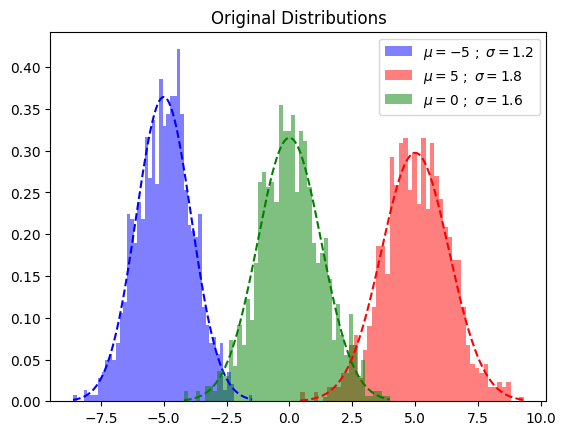

In [19]:
plot_pdf(mu1, np.sqrt(sigma1), label=f'$\mu={mu1} \ ; \ \sigma={sigma1}$', linestyle='k--', color='blue')
plot_pdf(mu2, np.sqrt(sigma2), label=f'$\mu={mu2} \ ; \ \sigma={sigma2}$', color='red')
plot_pdf(mu3, np.sqrt(sigma3), label=f'$\mu={mu3} \ ; \ \sigma={sigma3}$', color='green')
plt.title('Original Distributions')
plt.legend()
plt.show()

In [23]:
def random_init(X, n_components):
    # Randomly initialize the means by selecting random samples from the data
    
    pi = np.ones(n_components) / n_components
    means = np.random.choice(X, n_components)
    variances = np.random.random_sample(n_components)
    plot_pdf(means[0], np.sqrt(variances[0]), 'Random Init 1', color='blue')
    plot_pdf(means[1], np.sqrt(variances[1]), 'Random Init 2', color='red')
    plot_pdf(means[2], np.sqrt(variances[2]), 'Random Init 3', color='green')
    plt.title('Randomly Initialized Parameters')
    plt.legend()
    plt.show()
    
    return means, variances, pi